# Processing Pipeline

### Import Data

In [19]:
import numpy as np
import pandas as pd

# Load the CSV file
df = pd.read_csv('pvtLapseCuedBreaths.csv')

# Display the first few rows to ensure it was loaded correctly
df.head()

,SN,AIM,Label,EventNumber,ElapsedTime,taskOrder,loadOrderCT,loadOrderBP,breathID,pvtEventType,...,dynamicEngagementStdC3Mean,dynamicEngagementStdCzMean,dynamicEngagementStdC4Mean,dynamicEngagementStdT8Mean,dynamicEngagementStdP3Mean,dynamicEngagementStdPzMean,dynamicEngagementStdP4Mean,dynamicEngagementStdPO7Mean,dynamicEngagementStdPO8Mean,slope
0,1,3,2,1,5.753758,1,2,1,1,1,...,0.113421,0.155635,0.161870,0.285313,0.152501,0.186019,0.240056,0.110725,0.143885,1.366155
1,1,3,2,3,13.572336,1,2,1,5,1,...,0.100629,0.099635,0.133095,0.099894,0.098866,0.119116,0.119161,0.090132,0.049257,2.136047
2,1,3,2,5,16.295403,1,2,1,6,1,...,0.114155,0.124752,0.184249,0.125380,0.117239,0.143800,0.088000,0.056483,0.060433,1.581471
3,1,3,2,7,25.465215,1,2,1,10,1,...,0.040460,0.032827,0.066686,0.078532,0.102378,0.084160,0.088703,0.178366,0.255398,2.080539
4,1,3,2,9,29.833602,1,2,1,12,1,...,0.107940,0.166760,0.207947,0.192561,0.133129,0.170145,0.182658,0.174587,0.148949,1.933956


In [20]:
# Step 0: Replace 'inf' and '-inf' with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Move 'pvtLapse' to the end of the DataFrame
df['pvtLapse'] = df.pop('pvtLapse')

# Step 0.5: Drop the first 24 columns
df = df.iloc[:, 24:]

# Step 1: Remove columns with more than a certain percentage of NaN values
threshold = 0.15  # Set your desired threshold (15% as an example)
nan_percentage = df.isna().mean()
cleaned_data = df.loc[:, nan_percentage < threshold]

# Step 2: Remove any remaining rows that contain NaN values
final_cleaned_data = cleaned_data.dropna()

# Save the cleaned dataset
final_cleaned_data.to_csv('cleaned_pvtLapseCuedBreaths.csv', index=False)

print("Columns and rows with NaN and infinite values removed. Cleaned dataset saved.")
# Display the first few rows to ensure it was loaded correctly
final_cleaned_data.head()

Columns and rows with NaN and infinite values removed. Cleaned dataset saved.


,hasAbdomen,Age,Sex,Height,Weight,BMI,Body fat,Visceral fat,Muscle,Resting Metabolism,...,dynamicEngagementStdCzMean,dynamicEngagementStdC4Mean,dynamicEngagementStdT8Mean,dynamicEngagementStdP3Mean,dynamicEngagementStdPzMean,dynamicEngagementStdP4Mean,dynamicEngagementStdPO7Mean,dynamicEngagementStdPO8Mean,slope,pvtLapse
403,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.064604,0.111354,0.190684,0.092050,0.133631,0.161709,0.140540,0.117743,1.113412,0
404,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.071843,0.209900,0.188818,0.081964,0.097058,0.069702,0.131254,0.106447,0.660752,0
405,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.071843,0.209900,0.188818,0.081964,0.097058,0.069702,0.131254,0.106447,0.660752,1
406,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.200444,0.126154,0.238952,0.073345,0.073710,0.137590,0.168856,0.327183,0.411087,0
407,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.060043,0.090141,0.207187,0.228111,0.047890,0.078352,0.132885,0.210823,0.909466,0


In [21]:
# Check for NaN values in the dataset
nan_exists = final_cleaned_data.isna().any().any()

if nan_exists:
    print("There are NaN values in the dataset.")
    
    # Display the count of NaN values in each column
    nan_columns = final_cleaned_data.isna().sum()
    print("Columns with NaN values and their counts:\n", nan_columns[nan_columns > 0])
else:
    print("The dataset is free of NaN values.")

The dataset is free of NaN values.


## Ratio Customization Function

In [22]:
trimmed_df = final_cleaned_data

In [23]:
trimmed_df

,hasAbdomen,Age,Sex,Height,Weight,BMI,Body fat,Visceral fat,Muscle,Resting Metabolism,...,dynamicEngagementStdCzMean,dynamicEngagementStdC4Mean,dynamicEngagementStdT8Mean,dynamicEngagementStdP3Mean,dynamicEngagementStdPzMean,dynamicEngagementStdP4Mean,dynamicEngagementStdPO7Mean,dynamicEngagementStdPO8Mean,slope,pvtLapse
403,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.064604,0.111354,0.190684,0.092050,0.133631,0.161709,0.140540,0.117743,1.113412,0
404,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.071843,0.209900,0.188818,0.081964,0.097058,0.069702,0.131254,0.106447,0.660752,0
405,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.071843,0.209900,0.188818,0.081964,0.097058,0.069702,0.131254,0.106447,0.660752,1
406,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.200444,0.126154,0.238952,0.073345,0.073710,0.137590,0.168856,0.327183,0.411087,0
407,1,27,0,158.0,52.9,21.2,33.2,4.0,25.4,1216.0,...,0.060043,0.090141,0.207187,0.228111,0.047890,0.078352,0.132885,0.210823,0.909466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1,21,0,164.0,55.5,20.7,27.5,3.0,30.4,1262.0,...,0.167335,0.114157,0.102669,0.092031,0.115975,0.096270,0.161044,0.100751,1.153363,0
3386,1,21,0,164.0,55.5,20.7,27.5,3.0,30.4,1262.0,...,0.081338,0.154882,0.272220,0.139381,0.194898,0.251647,0.117826,0.203455,0.805675,1
3387,1,21,0,164.0,55.5,20.7,27.5,3.0,30.4,1262.0,...,0.080129,0.063773,0.206775,0.123310,0.079425,0.160552,0.207694,0.259811,0.691532,0
3388,1,21,0,164.0,55.5,20.7,27.5,3.0,30.4,1262.0,...,0.046122,0.072611,0.128660,0.047605,0.077869,0.170613,0.024898,0.043218,0.754430,0


## Baseline Model Training and Original Analysis

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming trimmed_df is your DataFrame with enough observations
X = trimmed_df.drop(columns=['pvtLapse'])  # Features
y = trimmed_df['pvtLapse']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

Accuracy of the Random Forest model: 0.90


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model with tuned parameters
model = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=200,
    random_state=42
)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

Accuracy of the Random Forest model with tuned parameters: 0.89


In [26]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None]
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train a Random Forest model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.94


Accuracy of the Random Forest model with tuned parameters: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       520
           1       0.64      0.42      0.50        77

    accuracy                           0.89       597
   macro avg       0.78      0.69      0.72       597
weighted avg       0.88      0.89      0.88       597



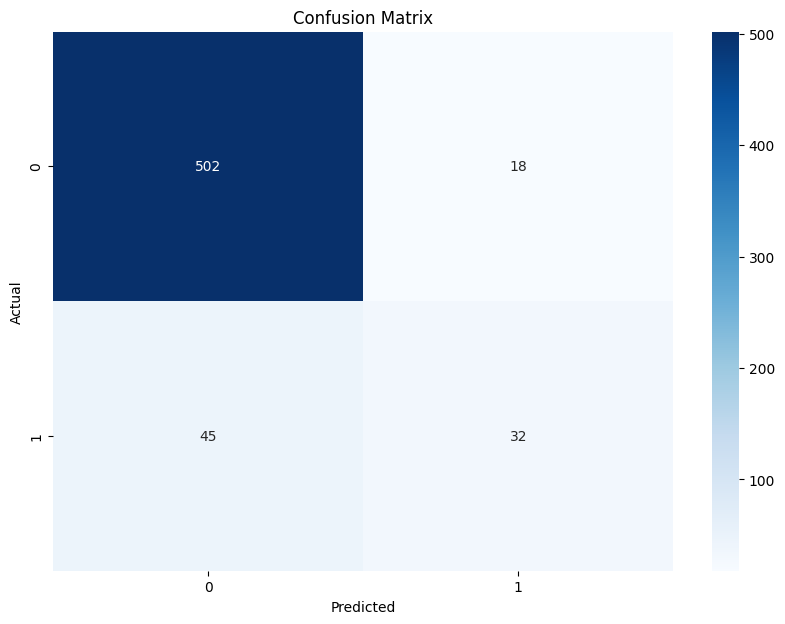

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [27]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")

## Plot feature importances
#importances = best_model.feature_importances_
#indices = np.argsort(importances)[::-1]

#plt.figure(figsize=(10, 6))
#plt.title("Feature Importances")
#plt.bar(range(X.shape), importances[indices], align="center")
#plt.xticks(range(X.shape), X.columns[indices], rotation=90)
#plt.xlim([-1, X.shape])
#plt.show()

Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.95
Accuracy of the SVM model with tuned parameters: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       520
           1       0.56      0.36      0.44        77

    accuracy                           0.88       597
   macro avg       0.74      0.66      0.69       597
weighted avg       0.87      0.88      0.87       597



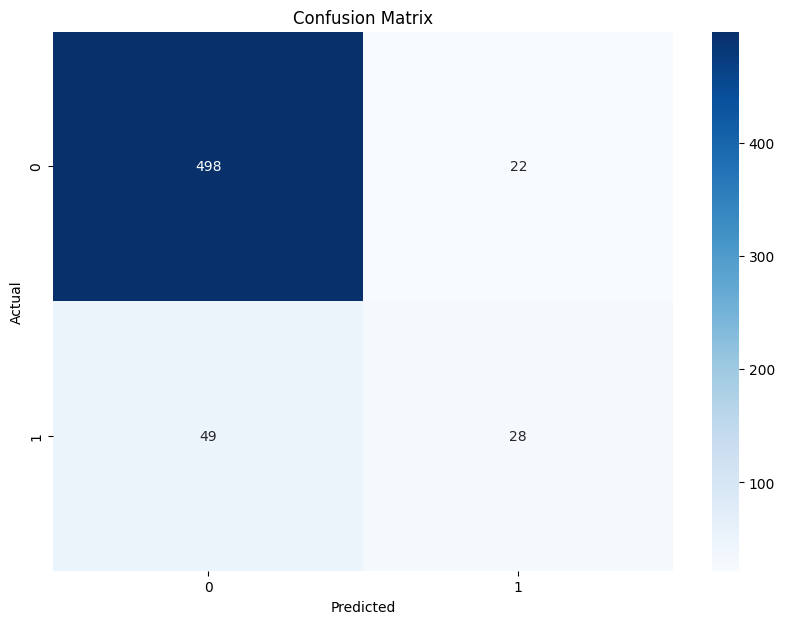

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [28]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [100],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train an SVM model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")